<a href="https://colab.research.google.com/github/nico-de-vietri/sales-data-analysis-I/blob/main/notebooks/exploratory-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing libraries
import pandas as pd
from urllib.parse import urlparse

# creating funtions

def is_valid_url(url):
    parsed = urlparse(url)
    return all([parsed.scheme, parsed.netloc])

def load_csv_from_url(url):
  '''
  it takes url and checks the encoding of the data
  '''
  if not is_valid_url(url):
    raise ValueError('provided url is not valid')

  # list of encodings, hardcoded, could be more dynamic
  encodings_to_try = ['utf-8', 'latin1', 'cp1252', 'utf-16']
  # by default just in case everything fails
  df = None

  for encoding in encodings_to_try:
    try:
      df = pd.read_csv(url, encoding=encoding)
      print(f'file read with encoding {encoding}')
      break
    except UnicodeDecodeError:
        print(f'failed with encoding {encoding}')
    except Exception as e:
        print(f'another error {e} with {encoding}')
  if df is None:
    raise ValueError("could not read the file with any known encoding.")

  return df

# loading raw csv file from GitHub repo

url = 'https://github.com/nico-de-vietri/sales-data-analysis-I/raw/refs/heads/main/data/Sample%20-%20Superstore.csv'


df = load_csv_from_url(url)

df.head()



failed with encoding utf-8
file read with encoding latin1


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# rows and cols
print(f"Shape: {df.shape}")


In [5]:
# cols and types
print("Columns and type:")
print(df.dtypes)


Columns and type:
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


In [6]:
# null values
print("null values per column:")
print(df.isnull().sum())


null values per column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [7]:
# duplicates
duplicates = df.duplicated().sum()
print(f"duplicated rows: {duplicates}")


duplicated rows: 0


In [12]:
# summary statistics
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
df.describe(include='object')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,1334,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [18]:
df_summary = df.groupby('Category').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': pd.Series.nunique,
    'Quantity': 'sum'
}).reset_index()

df_summary.rename(columns={'Order ID': 'Num Orders', 'Quantity': 'Num Items'}, inplace=True)

df_summary['Sales %'] = df_summary['Sales'] / df['Sales'].sum() * 100
df_summary['Profit %'] = df_summary['Profit'] / df['Profit'].sum() * 100
df_summary['Profit per Sale'] = df_summary['Profit'] / df_summary['Sales']
df_summary['Profit per Item'] = df_summary['Profit'] / df_summary['Num Items']

df_summary = df_summary.sort_values(by='Profit', ascending=False)
df_summary


,Category,Sales,Profit,Num Orders,Num Items,Sales %,Profit %,Profit per Sale,Profit per Item
2,Technology,836154.0330,145454.9481,1544,6939,36.398821,50.787870,0.173957,20.961947
1,Office Supplies,719047.0320,122490.8008,3742,22906,31.301008,42.769579,0.170352,5.347542
0,Furniture,741999.7953,18451.2728,1764,8028,32.300171,6.442551,0.024867,2.298365


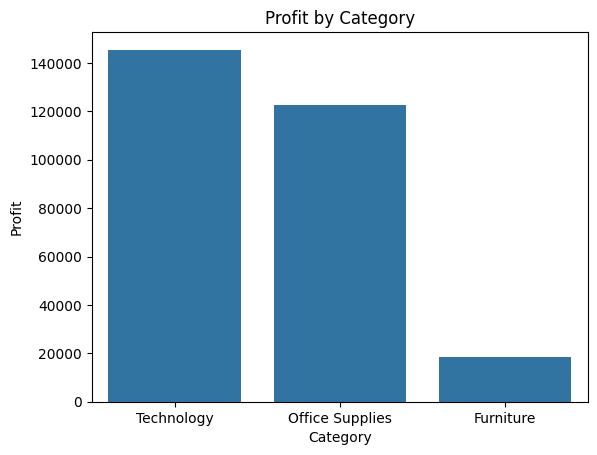

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df_summary, x='Category', y='Profit')
plt.title("Profit by Category")
plt.show()


In [36]:
df_products = df.groupby(['Product Name','Category']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': pd.Series.nunique,
    'Quantity': 'sum'
}).reset_index()

df_products.rename(columns={'Order ID': 'Num Orders', 'Quantity': 'Num Items'}, inplace=True)

df_products['Sales %'] = df_products['Sales'] / df['Sales'].sum() * 100
df_products['Profit %'] = df_products['Profit'] / df['Profit'].sum() * 100
df_products['Profit per Sale'] = df_products['Profit'] / df_products['Sales']
df_products['Profit per Item'] = df_products['Profit'] / df_products['Num Items']

df_products_profit = df_products.sort_values(by='Profit', ascending=False)
df_products_profit_percent = df_products.sort_values(by='Profit %', ascending=False)
df_products_profit_unit = df_products.sort_values(by='Profit per Item', ascending=False)
df_products_profit.head(10)


,Product Name,Category,Sales,Profit,Num Orders,Num Items,Sales %,Profit %,Profit per Sale,Profit per Item
404,Canon imageCLASS 2200 Advanced Copier,Technology,61599.824,25199.9280,5,20,2.681517,8.798949,0.409091,1259.996400
650,Fellowes PB500 Electric Punch Plastic Comb Bin...,Office Supplies,27453.384,7753.0390,10,31,1.195080,2.707095,0.282407,250.098032
805,Hewlett Packard LaserJet 3310 Copier,Technology,18839.686,6983.8836,8,38,0.820115,2.438532,0.370701,183.786411
400,Canon PC1060 Personal Laser Copier,Technology,11619.834,4570.9347,4,19,0.505826,1.596013,0.393373,240.575511
787,HP Designjet T520 Inkjet Large Format Printer ...,Technology,18374.895,4094.9766,3,12,0.799882,1.429825,0.222857,341.248050
165,Ativa V4110MDD Micro-Cut Shredder,Technology,7699.890,3772.9461,2,11,0.335186,1.317383,0.490000,342.995100
19,"3D Systems Cube Printer, 2nd Generation, Magenta",Technology,14299.890,3717.9714,2,11,0.622492,1.298188,0.260000,337.997400
1276,Plantronics Savi W720 Multi-Device Wireless He...,Technology,9367.290,3696.2820,7,24,0.407770,1.290615,0.394595,154.011750
895,Ibico EPK-21 Electric Binding System,Office Supplies,15875.916,3345.2823,3,13,0.691098,1.168058,0.210714,257.329408
1840,Zebra ZM400 Thermal Label Printer,Technology,6965.700,3343.5360,2,6,0.303226,1.167448,0.480000,557.256000


In [34]:
df_products_profit_percent.head(10)

,Product Name,Category,Sales,Profit,Num Orders,Num Items,Sales %,Profit %,Profit per Sale,Profit per Item
404,Canon imageCLASS 2200 Advanced Copier,Technology,61599.824,25199.9280,5,20,2.681517,8.798949,0.409091,1259.996400
650,Fellowes PB500 Electric Punch Plastic Comb Bin...,Office Supplies,27453.384,7753.0390,10,31,1.195080,2.707095,0.282407,250.098032
805,Hewlett Packard LaserJet 3310 Copier,Technology,18839.686,6983.8836,8,38,0.820115,2.438532,0.370701,183.786411
400,Canon PC1060 Personal Laser Copier,Technology,11619.834,4570.9347,4,19,0.505826,1.596013,0.393373,240.575511
787,HP Designjet T520 Inkjet Large Format Printer ...,Technology,18374.895,4094.9766,3,12,0.799882,1.429825,0.222857,341.248050
165,Ativa V4110MDD Micro-Cut Shredder,Technology,7699.890,3772.9461,2,11,0.335186,1.317383,0.490000,342.995100
19,"3D Systems Cube Printer, 2nd Generation, Magenta",Technology,14299.890,3717.9714,2,11,0.622492,1.298188,0.260000,337.997400
1276,Plantronics Savi W720 Multi-Device Wireless He...,Technology,9367.290,3696.2820,7,24,0.407770,1.290615,0.394595,154.011750
895,Ibico EPK-21 Electric Binding System,Office Supplies,15875.916,3345.2823,3,13,0.691098,1.168058,0.210714,257.329408
1840,Zebra ZM400 Thermal Label Printer,Technology,6965.700,3343.5360,2,6,0.303226,1.167448,0.480000,557.256000


In [37]:
df_products_profit_unit.head(10)

,Product Name,Category,Sales,Profit,Num Orders,Num Items,Sales %,Profit %,Profit per Sale,Profit per Item
404,Canon imageCLASS 2200 Advanced Copier,Technology,61599.824,25199.9280,5,20,2.681517,8.798949,0.409091,1259.996400
405,Canon imageCLASS MF7460 Monochrome Digital Las...,Technology,3991.980,1995.9900,1,2,0.173776,0.696931,0.500000,997.995000
1840,Zebra ZM400 Thermal Label Printer,Technology,6965.700,3343.5360,2,6,0.303226,1.167448,0.480000,557.256000
165,Ativa V4110MDD Micro-Cut Shredder,Technology,7699.890,3772.9461,2,11,0.335186,1.317383,0.490000,342.995100
787,HP Designjet T520 Inkjet Large Format Printer ...,Technology,18374.895,4094.9766,3,12,0.799882,1.429825,0.222857,341.248050
19,"3D Systems Cube Printer, 2nd Generation, Magenta",Technology,14299.890,3717.9714,2,11,0.622492,1.298188,0.260000,337.997400
812,Hewlett-Packard Desktjet 6988DT Refurbished Pr...,Technology,3404.500,1668.2050,1,5,0.148202,0.582480,0.490000,333.641000
895,Ibico EPK-21 Electric Binding System,Office Supplies,15875.916,3345.2823,3,13,0.691098,1.168058,0.210714,257.329408
650,Fellowes PB500 Electric Punch Plastic Comb Bin...,Office Supplies,27453.384,7753.0390,10,31,1.195080,2.707095,0.282407,250.098032
397,Canon Image Class D660 Copier,Technology,3959.934,1691.9718,2,7,0.172381,0.590778,0.427273,241.710257
